In [1]:
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i]==s2[i]:
        i+=1
    return s1[:i]

longestCommonPrefix('ACCATGT', 'ACCAGAC')

'ACCA'

In [2]:
def match(s1, s2):
    if not len(s1) == len(s2):
        return False
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            return False
    return True

In [3]:
match('ACCT', 'ATTC')

False

In [4]:
complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}

In [5]:
complement['C']

'G'

In [6]:
def reverseComplement(s):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement('ACCGTCG')

'CGACGGT'

In [3]:
import urllib.request

url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
filename = 'test.txt'
urllib.request.urlretrieve(url, filename)
print(filename)

test.txt


In [4]:
import urllib.request

url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
filename = 'lamda_virus.fa'
urllib.request.urlretrieve(url, filename)
print(filename)

lamda_virus.fa


In [5]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('lamda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [6]:
len(genome)

48502

In [8]:
counts = {'A':0, 'C':0 , 'G':0, 'T':0}
for base in genome:
    counts[base]+=1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [1]:
import urllib.request

url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq'
filename = 'SRR835775_1.first1000.fastq'
urllib.request.urlretrieve(url, filename)
print(filename)

SRR835775_1.first1000.fastq


In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq)==0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [4]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


In [5]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [3]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [4]:
phred33ToQ('#')

2

In [5]:
phred33ToQ('J')

41

In [6]:
def createHist(qualities):
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] +=1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


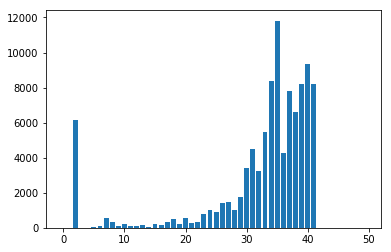

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

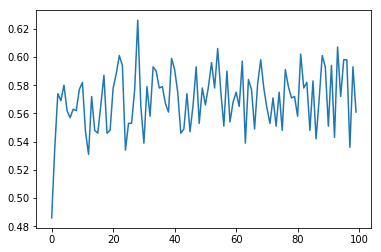

In [13]:
def findGCByPos(reads):
    gc = [0]*100
    totals = [0]*100
    
    for read in reads:
        for i in range(len(read)):
            if read[i]=='C' or read[i]=='G':
                gc[i]+=1
            totals[i]+=1
    for i in range(len(gc)):
        if totals[i]>0:
            gc[i] = gc[i]/float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [14]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [4]:
import urllib.request

url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa'
filename = 'phix.fa'
urllib.request.urlretrieve(url, filename)
print(filename)

phix.fa


In [6]:
genome = readGenome('phix.fa')

In [9]:
#Exact Match Algorithm: Naive Algorithm

def naive(p, t):
    occurances = []
    for i in range(len(t)-len(p)+1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match == True:
            occurances.append(i)
    return occurances

In [8]:
import random
def generateReads(genome, numReads, readLen):
    '''Generate reads from random positions in the given genome'''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [10]:
reads = generateReads(genome, 100, 100)

numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched+=1
print('%d / %d reads matched exactly' %(numMatched, len(reads)))

100 / 100 reads matched exactly


In [11]:
import urllib.request

url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq'
filename = 'ERR266411_1.first1000.fastq'
urllib.request.urlretrieve(url, filename)
print(filename)

ERR266411_1.first1000.fastq


In [12]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq)==0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [13]:
phix_reads, _ = readFastq('ERR266411_1.first1000.fastq')

In [14]:
print(phix_reads)

['TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC', 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG', 'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC', 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG', 'GACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCG', 'CTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTT', 'CTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAAC

In [15]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n+=1
    if len(matches) > 0:
        numMatched+=1
print('%d / %d reads matched the genome' %(numMatched, n))

7 / 1000 reads matched the genome


In [16]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]
    matches = naive(r, genome)
    n+=1
    if len(matches) > 0:
        numMatched+=1
print('%d / %d reads matched the genome' %(numMatched, n))

459 / 1000 reads matched the genome


In [19]:
def reverseComplement(s):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [20]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]
    matches = naive(r, genome)   #read matching in the forward directon on the genome
    matches.extend(native(reverseComplement(r), genome))  #we'll add onto it the results of any matches of that read to the reverse complement of the genome
    n+=1
    if len(matches) > 0:
        numMatched+=1
print('%d / %d reads matched the genome' %(numMatched, n))

932 / 1000 reads matched the genome


In [1]:
# QUIZ Week1 Starts

import urllib.request

url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
filename = 'lambda_virus_quiz.fa'
urllib.request.urlretrieve(url, filename)
print(filename)

lambda_virus_quiz.fa


In [3]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('lambda_virus_quiz.fa')
print(genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

In [5]:
def reverseComplement(s):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [18]:
def naive(p, t):
    occurances = []
    for i in range(len(t)-len(p)+1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match == True:
            occurances.append(i)
    return occurances

numMatched = 0
n = 0
stringg = ['AGTCGA']
for r in stringg:
    matches = naive(r, genome)
    off1 = matches[0]
    matches = naive(reverseComplement(r), genome) 
    off2 = matches[0]
    
print(off1)
print(off2)

18005
450


In [23]:
def naive_2mm(p, t):
    occurances = []
    for i in range(len(t)-len(p)+1):
        match = True
        cnt=0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                cnt+=1
        if cnt>2:
            match = False
        if match == True:
            occurances.append(i)
    return occurances

In [24]:
numMatched = 0
n = 0
stringg = ['AGGAGGTT']
for r in stringg:
    matches = naive_2mm(r, genome)
    s = matches[0]

print(s)


49


In [25]:
import urllib.request

url = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq'
filename = 'ERR037900_1.first1000.fastq'
urllib.request.urlretrieve(url, filename)
print(filename)

ERR037900_1.first1000.fastq


In [26]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq)==0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

# QUIZ Week1 Ends